# Predicting Recidivsm using Machine Learning

Done By: Sahil Phule and Pooja Katte

In [222]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [223]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [9]:
df_pa = spark.read.option("delimiter","\t").option("header","true") \
    .csv("/project/data/ICPSR_36404/pris_admis/36404-0002-Data.tsv")

In [10]:
df_tr = spark.read.option("delimiter","\t").option("header","true") \
    .csv("/project/data/ICPSR_36404/term_rec/36404-0001-Data.tsv")

In [11]:
df_pr = spark.read.option("delimiter","\t").option("header","true") \
    .csv("/project/data/ICPSR_36404/pris_rel/36404-0003-Data.tsv")


In [12]:
df_yep = spark.read.option("delimiter","\t").option("header","true") \
    .csv("/project/data/ICPSR_36404/year_end_pop/36404-0004-Data.tsv")


In [13]:
df_tr.createOrReplaceTempView("term_rec")

In [14]:
spark.sql("select * from term_rec limit 1")

DataFrame[ABT_INMATE_ID: string, SEX: string, ADMTYPE: string, OFFGENERAL: string, EDUCATION: string, ADMITYR: string, RELEASEYR: string, MAND_PRISREL_YEAR: string, PROJ_PRISREL_YEAR: string, PARELIG_YEAR: string, SENTLGTH: string, OFFDETAIL: string, RACE: string, AGEADMIT: string, AGERELEASE: string, TIMESRVD: string, RELTYPE: string, STATE: string]

In [15]:
spark.sql("select count(*) from term_rec").show()

+--------+
|count(1)|
+--------+
|10907333|
+--------+



# Counting values and plotting graph
## In term records

### For ADMTYPE

In [16]:
spark.sql("select ADMTYPE, count(1)as num from term_rec group by ADMTYPE ").show()

+-------+-------+
|ADMTYPE|    num|
+-------+-------+
|      3| 140478|
|      9| 295414|
|      1|7331789|
|      2|3139652|
+-------+-------+



In [144]:
admtype = spark.sql("select ADMTYPE, count(1)as num from term_rec group by ADMTYPE ").toPandas()

In [145]:
admtype

,ADMTYPE,num
0,3,140478
1,9,295414
2,1,7331789
3,2,3139652


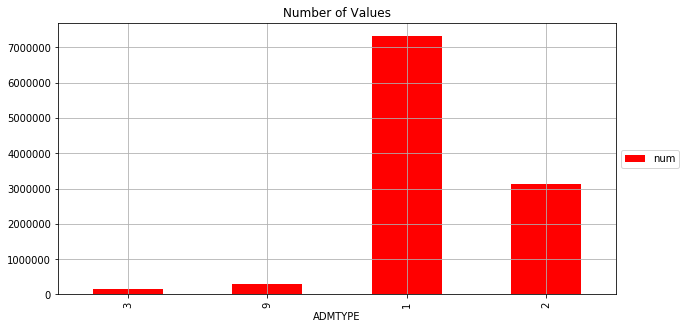

In [149]:
admtype.plot(x=admtype.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing Values are: 295414

### For OFFGENERAL

In [20]:
offgeneral = spark.sql("select OFFGENERAL, count(1)as num from term_rec group by OFFGENERAL ").toPandas()

In [21]:
offgeneral

,OFFGENERAL,num
0,3,3044926
1,5,87010
2,9,71108
3,1,2984039
4,4,1561247
5,2,3159003


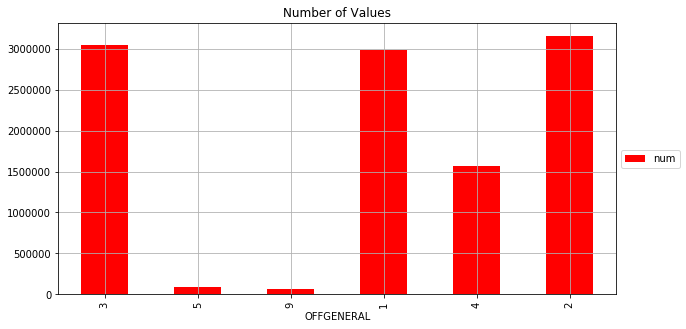

In [22]:
offgeneral.plot(x=offgeneral.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing Value are 71108

### For EDUCATION

In [23]:
education = spark.sql("select EDUCATION, count(1)as num from term_rec group by EDUCATION ").toPandas()

In [24]:
education

,EDUCATION,num
0,9,10907333


All the education values are missing

### For ADMITYR

In [25]:
admityr = spark.sql("select ADMITYR, count(1)as num from term_rec group by ADMITYR order by ADMITYR ").toPandas()

In [26]:
admityr

,ADMITYR,num
0,1950,22
1,1951,25
2,1952,40
3,1953,22
4,1954,36
5,1955,21
6,1956,35
7,1957,37
8,1958,61
9,1959,67


In [27]:
admityr.columns[1]

'num'

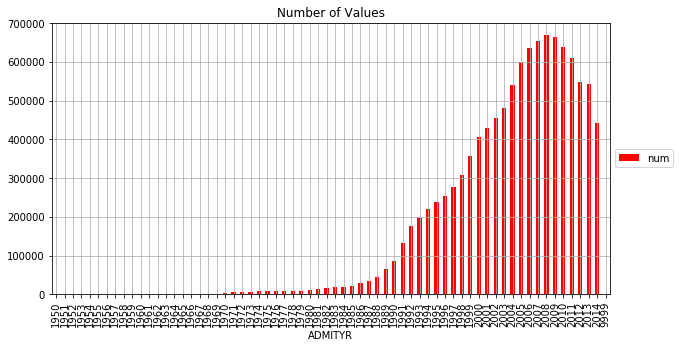

In [28]:
admityr.plot(x=admityr.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
admityr.loc[admityr['ADMITYR']=='9999']

,ADMITYR,num
65,9999,496


Missing Values are 496

### For RELEASEYR

In [30]:
releaseyr = spark.sql("select RELEASEYR, count(1)as num from term_rec group by RELEASEYR order by RELEASEYR ").toPandas()

In [31]:
releaseyr

,RELEASEYR,num
0,1971,3560
1,1972,5388
2,1973,5199
3,1974,5842
4,1975,6263
5,1976,6101
6,1977,6616
7,1978,7280
8,1979,6097
9,1980,7832


AttributeError: 'AxesSubplot' object has no attribute 'figsize'

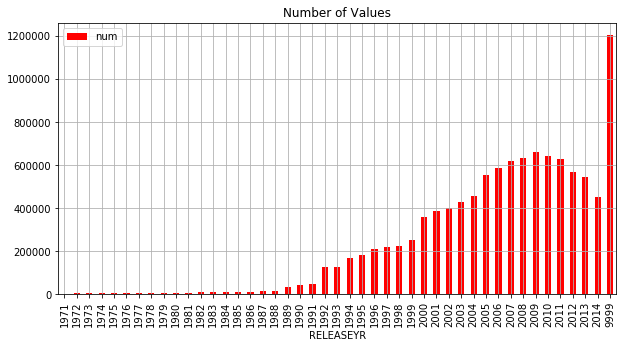

In [32]:
releaseyr.plot(x=releaseyr.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).figsize(10, 6).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
releaseyr.loc[releaseyr['RELEASEYR']=='9999']

### For MAND_PRISREL_YEAR

In [ ]:
mand_prisrel_year = releaseyr = spark.sql("select MAND_PRISREL_YEAR, count(1)as num from term_rec group by MAND_PRISREL_YEAR order by MAND_PRISREL_YEAR").toPandas()

In [ ]:
mand_prisrel_year

In [ ]:
mand_prisrel_year.plot(x=mand_prisrel_year.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### For PROJ_PRISREL_YEAR

In [33]:
proj_prisrel_year = releaseyr = spark.sql("select PROJ_PRISREL_YEAR, count(1)as num from term_rec group by PROJ_PRISREL_YEAR order by PROJ_PRISREL_YEAR").toPandas()

In [34]:
proj_prisrel_year

,PROJ_PRISREL_YEAR,num
0,,4662333
1,1900,1
2,1904,1
3,1905,2
4,1906,1
5,1907,2
6,1908,2
7,1909,9
8,1910,8
9,1913,1


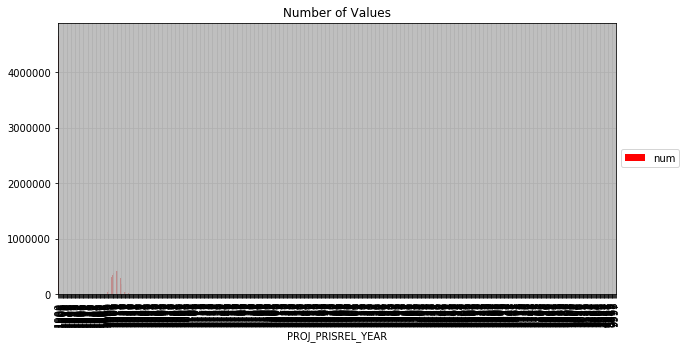

In [35]:
proj_prisrel_year.plot(x=proj_prisrel_year.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### for PARELIG_YEAR

In [36]:
parelig_year = spark.sql("select PARELIG_YEAR, count(1)as num from term_rec group by PARELIG_YEAR order by PARELIG_YEAR").toPandas()

In [37]:
parelig_year

,PARELIG_YEAR,num
0,,8148769
1,1944,1
2,1947,1
3,1960,1
4,1962,1
5,1963,2
6,1964,3
7,1965,1
8,1966,5
9,1967,5


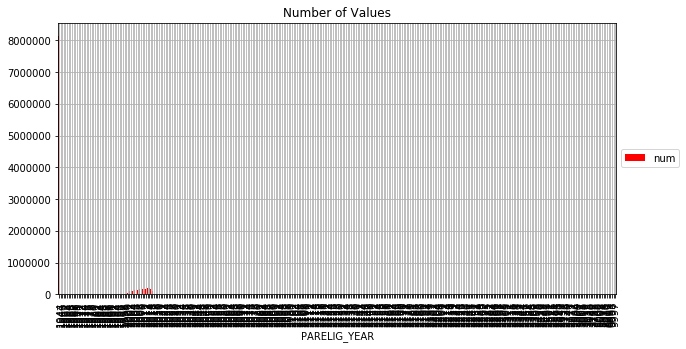

In [38]:
parelig_year.plot(x=parelig_year.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### For SENTLGTH

In [39]:
sentlgth = spark.sql("select SENTLGTH, count(1)as num from term_rec group by SENTLGTH order by SENTLGTH").toPandas()

In [40]:
sentlgth

,SENTLGTH,num
0,,20063
1,0,1442194
2,1,1057800
3,2,4274803
4,3,2271497
5,4,1287790
6,5,324961
7,6,173756
8,9,54469


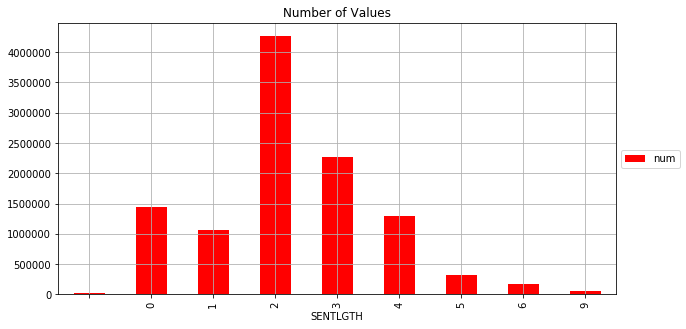

In [41]:
sentlgth.plot(x=sentlgth.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing values are 20063 + 54469 = 74532

### For OFFDETAIL

In [42]:
offdetail = spark.sql("select OFFDETAIL, count(1)as num from term_rec group by OFFDETAIL order by OFFDETAIL*1").toPandas()

In [43]:
offdetail

,OFFDETAIL,num
0,1,299288
1,2,64662
2,3,545237
3,4,875687
4,5,971245
5,6,227920
6,7,1270749
7,8,786043
8,9,287965
9,10,444212


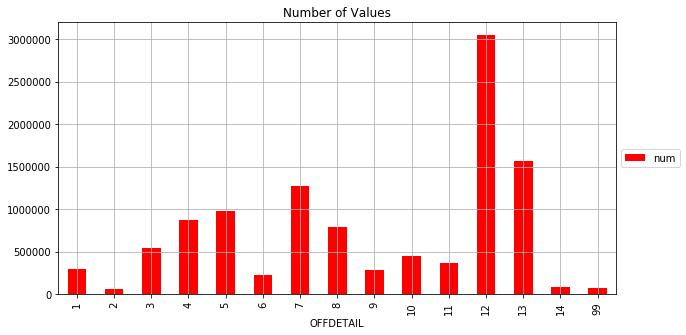

In [44]:
offdetail.plot(x=offdetail.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing  value are: 71108

### For RACE

In [45]:
race = spark.sql("select RACE, count(1)as num from term_rec group by RACE order by RACE").toPandas()

In [46]:
race

,RACE,num
0,1,3886774
1,2,3820429
2,3,1795022
3,4,224126
4,9,1180982


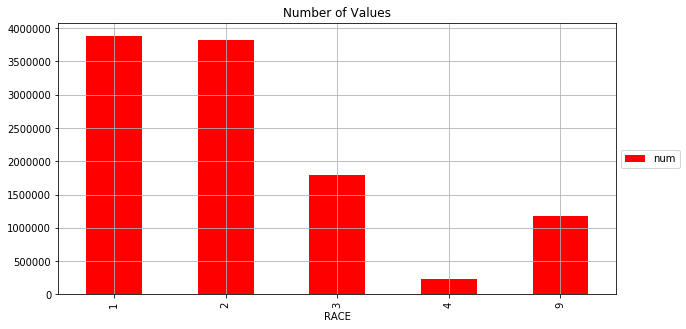

In [47]:
race.plot(x=race.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing Vales are 1180982

### For AGEADMIT

In [48]:
ageadmit = spark.sql("select AGEADMIT, count(1)as num from term_rec group by AGEADMIT order by AGEADMIT").toPandas()

In [49]:
ageadmit

,AGEADMIT,num
0,1,2712139
1,2,3875867
2,3,2754302
3,4,1261538
4,5,303487


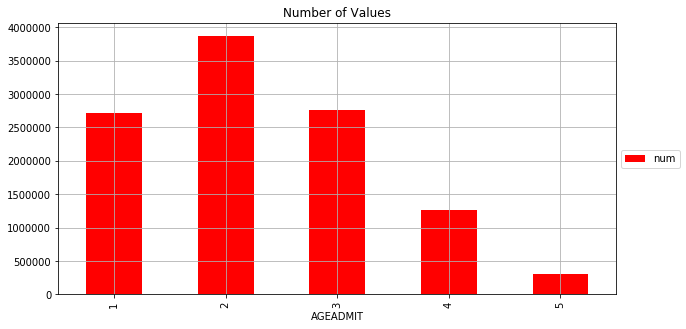

In [50]:
ageadmit.plot(x=ageadmit.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

No Missing values

### For AGERELEASE

In [51]:
agerelease = spark.sql("select AGERELEASE, count(1)as num from term_rec group by AGERELEASE order by AGERELEASE").toPandas()

In [52]:
agerelease

,AGERELEASE,num
0,,1200886
1,1,1775026
2,2,3556931
3,3,2678000
4,4,1336658
5,5,359832


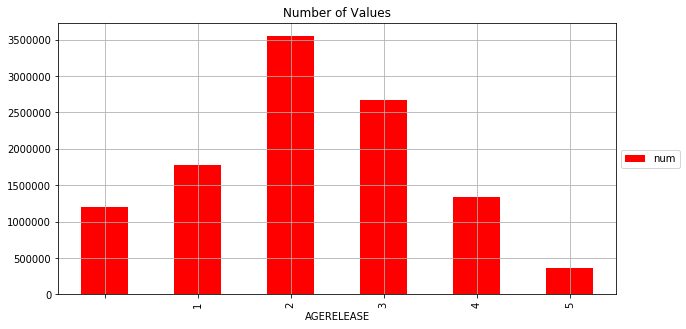

In [53]:
agerelease.plot(x=agerelease.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

No missing values apart from blank values

### For TIMESRVD

In [54]:
timesrvd = spark.sql("select TIMESRVD, count(1)as num from term_rec group by TIMESRVD order by TIMESRVD").toPandas()

In [55]:
timesrvd

,TIMESRVD,num
0,0,5617334
1,1,1929443
2,2,1524290
3,3,447602
4,4,187778
5,9,1200886


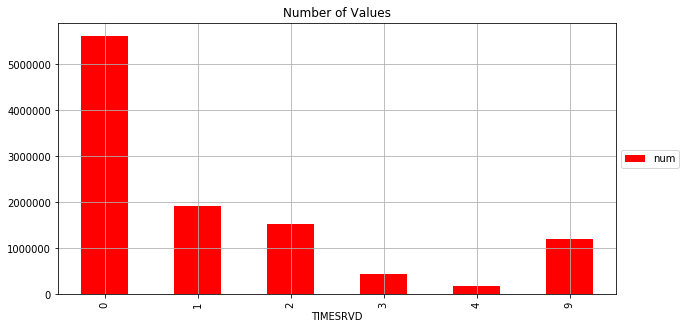

In [56]:
timesrvd.plot(x=timesrvd.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Missing values are 1200886

### For RELTYPE

In [57]:
reltype = spark.sql("select RELTYPE, count(1)as num from term_rec group by RELTYPE order by RELTYPE").toPandas()

In [58]:
reltype

,RELTYPE,num
0,,1809372
1,1,6665600
2,2,2245899
3,3,186462


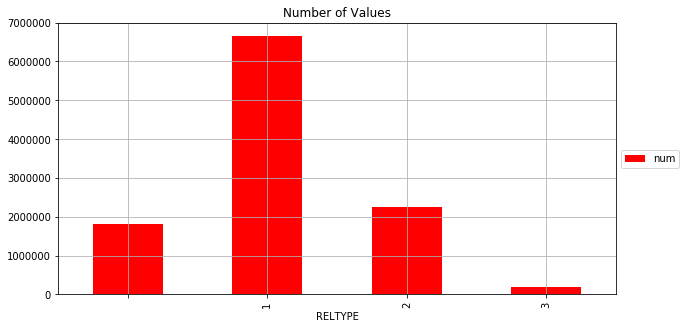

In [60]:
reltype.plot(x=reltype.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

No missing Values

### For STATE

In [61]:
state = spark.sql("select STATE, count(1)as num from term_rec group by STATE order by STATE*1").toPandas()

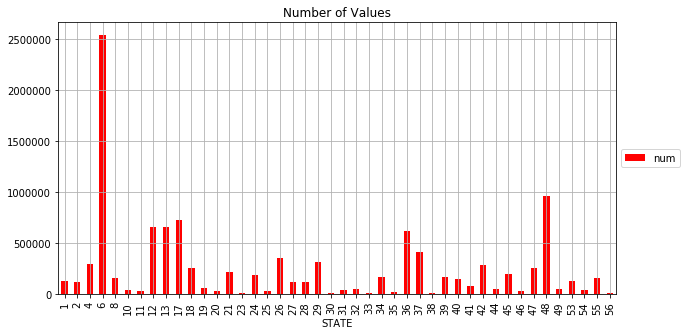

In [62]:
state.plot(x=state.columns[0], kind='bar', color='Red', title="Number of Values", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

______________________________________________________________________

### dropping columns MAND_PRISREL_YEAR, PROJ_PRISREL_YEAR,  PARELIG_YEAR,AGERELEASE as they contain a lot of missing values also dropping education as all values are missing

In [63]:
spark.sql("select ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,TIMESRVD,RELTYPE,STATE from term_rec").createOrReplaceTempView("term_rec_clV1")

### removing missing data


In [64]:
spark.sql("select * from term_rec_clV1 where RELEASEYR != '9999' AND ADMTYPE != '9' AND OFFGENERAL != '9' AND ADMITYR != '9999' AND OFFDETAIL != '99' AND RACE != '9' AND AGEADMIT != '9' AND OFFDETAIL != '9' AND SENTLGTH != '9' AND RELTYPE != '9' AND TIMESRVD != '9' AND RELTYPE != ' ' AND SENTLGTH != ' '").createOrReplaceTempView("term_rec_clean")

In [65]:
spark.sql("select count(*) from term_rec_clean").show()

+--------+
|count(1)|
+--------+
| 7727018|
+--------+



### creating rep off and class

In [66]:
spark.sql("select ABT_INMATE_ID ,count(*) as num from term_rec_clean group by ABT_INMATE_ID").createOrReplaceTempView("rep_off")

In [67]:
spark.sql("select * from rep_off").show()

+-------------------+---+
|      ABT_INMATE_ID|num|
+-------------------+---+
|A062015000001907370|  5|
|A062015000002568681| 13|
|A062015000000545050|  2|
|A062015000001131898|  3|
|A062015000000648432|  5|
|A062015000002615407|  1|
|A062015000001653894|  9|
|A062015000002327469| 12|
|A062015000002037956|  5|
|A062015000001841836|  2|
|A062015000002142148|  3|
|A062015000002216790|  2|
|A062015000002014729|  8|
|A062015000000508065|  3|
|A062015000001999103|  6|
|A062015000001426783| 10|
|A062015000000680899| 13|
|A062015000000678389|  1|
|A062015000001616635|  1|
|A062015000002427954|  2|
+-------------------+---+
only showing top 20 rows



In [68]:
spark.sql("select count (*) from rep_off").show()

+--------+
|count(1)|
+--------+
| 4415146|
+--------+



In [69]:
spark.sql("select *, case when num = '1' then 0 else 1 end as class from rep_off").createOrReplaceTempView("rep_off_class")

In [70]:
spark.sql("select * from rep_off_class where ABT_INMATE_ID = 'A132015000000535415'").show()

+-------------------+---+-----+
|      ABT_INMATE_ID|num|class|
+-------------------+---+-----+
|A132015000000535415|  3|    1|
+-------------------+---+-----+



In [71]:
spark.sql("select * from term_rec_clean where ABT_INMATE_ID='A132015000000535415'").show()

+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+
|      ABT_INMATE_ID|SEX|ADMTYPE|OFFGENERAL|ADMITYR|RELEASEYR|SENTLGTH|OFFDETAIL|RACE|AGEADMIT|TIMESRVD|RELTYPE|STATE|
+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+
|A132015000000535415|  1|      2|         2|   1978|     1979|       0|        7|   1|       1|       0|      2|   13|
|A132015000000535415|  1|      1|         2|   1978|     1978|       1|        7|   1|       1|       0|      2|   13|
|A132015000000535415|  1|      1|         2|   1980|     1980|       0|        7|   1|       1|       0|      2|   13|
+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+



### adding rep offence and class column

In [72]:
spark.sql("select a.SEX,a.ADMTYPE,a.OFFGENERAL,a.ADMITYR,a.RELEASEYR,a.SENTLGTH,a.OFFDETAIL,a.RACE,a.AGEADMIT,a.TIMESRVD,a.RELTYPE,a.STATE,b.num AS repoff, b.class from term_rec_clean a left join rep_off_class b on (a.ABT_INMATE_ID = b.ABT_INMATE_ID)").createOrReplaceTempView("pris_data")

In [129]:
spark.sql("select * from pris_data ").show()

+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+------+-----+
|SEX|ADMTYPE|OFFGENERAL|ADMITYR|RELEASEYR|SENTLGTH|OFFDETAIL|RACE|AGEADMIT|TIMESRVD|RELTYPE|STATE|repoff|class|
+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+------+-----+
|  1|      1|         1|   2010|     2010|       4|        5|   1|       2|       0|      3|    1|     1|    0|
|  1|      1|         3|   2007|     2008|       3|       12|   1|       2|       0|      2|    1|     2|    1|
|  1|      1|         4|   2012|     2012|       0|       13|   1|       2|       0|      1|    1|     2|    1|
|  1|      1|         2|   2014|     2014|       0|        8|   1|       4|       0|      3|    1|     2|    1|
|  1|      1|         2|   2009|     2009|       0|        7|   1|       4|       0|      3|    1|     2|    1|
|  1|      3|         3|   2007|     2009|       2|       12|   1|       1|       1|      1|    1|     1

In [73]:
spark.sql("select count(*) from pris_data ").show()

+--------+
|count(1)|
+--------+
| 7727018|
+--------+



In [74]:
pris_data_converted = spark.sql("select cast(SEX as int),cast(ADMTYPE as int),cast(OFFGENERAL as int),cast(ADMITYR as int),cast(RELEASEYR as int),cast(SENTLGTH as int),cast(OFFDETAIL as int),cast(RACE as int),cast(AGEADMIT as int),cast(TIMESRVD as int),cast(RELTYPE as int),cast(STATE as int),cast(class as double) as label from pris_data ")

In [75]:
pris_data_converted.printSchema()

root
 |-- SEX: integer (nullable = true)
 |-- ADMTYPE: integer (nullable = true)
 |-- OFFGENERAL: integer (nullable = true)
 |-- ADMITYR: integer (nullable = true)
 |-- RELEASEYR: integer (nullable = true)
 |-- SENTLGTH: integer (nullable = true)
 |-- OFFDETAIL: integer (nullable = true)
 |-- RACE: integer (nullable = true)
 |-- AGEADMIT: integer (nullable = true)
 |-- TIMESRVD: integer (nullable = true)
 |-- RELTYPE: integer (nullable = true)
 |-- STATE: integer (nullable = true)
 |-- label: double (nullable = true)



## Transforming Data

In [76]:
#from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

#label_indexer = StringIndexer(inputCol = 'class', outputCol = 'label')
#plan_indexer = StringIndexer(inputCol = 'intl_plan', outputCol = 'intl_plan_indexed')

numeric_cols = ["SEX","ADMTYPE","OFFGENERAL","ADMITYR","RELEASEYR","SENTLGTH",
                "OFFDETAIL","RACE","AGEADMIT","TIMESRVD","RELTYPE","STATE"]

assembler = VectorAssembler( inputCols = numeric_cols,outputCol = 'features')

## Splitting into train and test data 

In [77]:
train, test = pris_data_converted.randomSplit([0.7, 0.3], seed=42)

## Predictions using logistic regression

In [78]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,featuresCol = 'features')
pipeline_lr = Pipeline(stages=[assembler, lr])
model_lr=pipeline_lr.fit(train)

In [79]:
predictions_lr=model_lr.transform(test)

In [82]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
auroc_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "areaUnderROC"})

In [83]:
auroc_lr

0.5

## Predictions using random forest

In [84]:

from pyspark.ml.classification import RandomForestClassifier

#classifier = RandomForestClassifier(labelCol = 'class', featuresCol = 'features')
classifier = RandomForestClassifier(featuresCol = 'features')
pipeline = Pipeline(stages=[assembler, classifier])
model = pipeline.fit(train)

In [85]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
predictions = model.transform(test)


In [86]:
#evaluator = BinaryClassificationEvaluator(labelCol='class')
evaluator = BinaryClassificationEvaluator()
auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

In [87]:
auroc

0.773421178031108

## second method

In [88]:
modelv2 = classifier.fit(assembler.transform(train))

In [89]:
predictionsv2 = modelv2.transform(assembler.transform(test))

In [90]:
auroc = evaluator.evaluate(predictionsv2, {evaluator.metricName: "areaUnderROC"})

In [91]:
auroc

0.7734211780311083

In [92]:
modelv2.featureImportances

SparseVector(12, {0: 0.0066, 1: 0.6314, 2: 0.0047, 3: 0.0086, 4: 0.0425, 5: 0.0212, 6: 0.0258, 7: 0.0265, 8: 0.012, 9: 0.0972, 10: 0.0029, 11: 0.1206})

### Plotting graph of  features importance

In [196]:
import pandas as pd
import numpy as np
cols = np.array(['SEX',
'ADMTYPE',
'OFFGENERAL',
'ADMITYR',
'RELEASEYR',
'SENTLGTH',
'OFFDETAIL',
'RACE',
'AGEADMIT',
'TIMESRVD',
'RELTYPE',
'STATE'])

tempdf = pd.DataFrame(modelv2.featureImportances.toArray().tolist())

In [200]:
tempdf['cols'] = cols

In [201]:
tempdf

,0,cols
0,0.006554,SEX
1,0.631351,ADMTYPE
2,0.004750,OFFGENERAL
3,0.008583,ADMITYR
4,0.042548,RELEASEYR
5,0.021240,SENTLGTH
6,0.025794,OFFDETAIL
7,0.026464,RACE
8,0.012028,AGEADMIT
9,0.097150,TIMESRVD


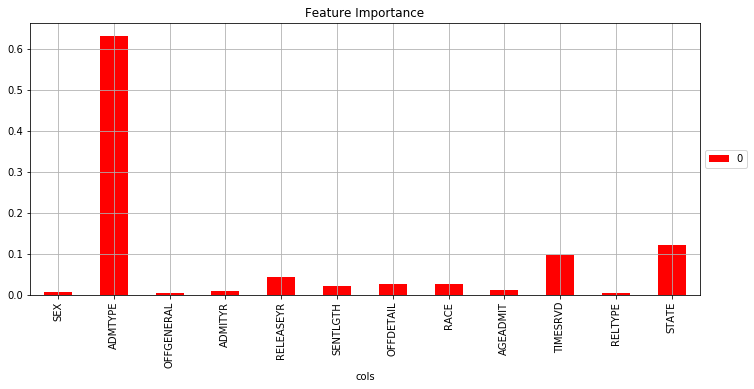

In [225]:
tempdf.plot(x= tempdf['cols'], kind='bar', color='Red', title="Feature Importance", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [538]:
predictions

DataFrame[SEX: int, ADMTYPE: int, OFFGENERAL: int, ADMITYR: int, RELEASEYR: int, SENTLGTH: int, OFFDETAIL: int, RACE: int, AGEADMIT: int, TIMESRVD: int, RELTYPE: int, STATE: int, label: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [133]:
predictions.select("rawPrediction","probability","prediction").show()

+--------------------+--------------------+----------+
|       rawPrediction|         probability|prediction|
+--------------------+--------------------+----------+
|[13.0917100331090...|[0.65458550165545...|       0.0|
|[10.3510384987686...|[0.51755192493843...|       0.0|
|[13.3052978304523...|[0.66526489152261...|       0.0|
|[8.66845117924706...|[0.43342255896235...|       1.0|
|[8.97732678655179...|[0.44886633932758...|       1.0|
|[8.82894423746939...|[0.44144721187346...|       1.0|
|[8.9018615036745,...|[0.44509307518372...|       1.0|
|[8.83485816752092...|[0.44174290837604...|       1.0|
|[13.7810648270564...|[0.68905324135282...|       0.0|
|[8.67436510929858...|[0.43371825546492...|       1.0|
|[8.83485816752092...|[0.44174290837604...|       1.0|
|[10.7664295861607...|[0.53832147930803...|       0.0|
|[8.66845117924706...|[0.43342255896235...|       1.0|
|[9.19439273301764...|[0.45971963665088...|       1.0|
|[9.5680641996221,...|[0.47840320998110...|       1.0|
|[14.45022

## Re creating the class variable 

In [93]:
spark.sql("select ABT_INMATE_ID,ADMITYR, count(*) as num from term_rec_clean group by ABT_INMATE_ID,ADMITYR").createOrReplaceTempView("rep_off_v2")

In [94]:
spark.sql("select * from rep_off_v2").show()

+-------------------+-------+---+
|      ABT_INMATE_ID|ADMITYR|num|
+-------------------+-------+---+
|A062015000001095798|   2003|  1|
|A062015000001294777|   2009|  1|
|A062015000001476138|   2003|  1|
|A062015000002218142|   2005|  1|
|A062015000000012492|   1997|  1|
|A062015000001100182|   2001|  1|
|A062015000001365745|   2006|  2|
|A062015000001357854|   2008|  1|
|A062015000001638888|   1996|  1|
|A062015000000452040|   1996|  1|
|A062015000001534588|   2010|  1|
|A062015000000011223|   1999|  1|
|A062015000000279403|   2010|  3|
|A062015000002207240|   1992|  3|
|A062015000000912428|   1997|  1|
|A062015000000424586|   2008|  1|
|A062015000000667529|   2007|  1|
|A062015000000108087|   2001|  1|
|A062015000001922513|   1993|  1|
|A062015000002006056|   1992|  1|
+-------------------+-------+---+
only showing top 20 rows



In [95]:
spark.sql("select * from rep_off_v2 where ABT_INMATE_ID = 'A132015000000535415'").show()

+-------------------+-------+---+
|      ABT_INMATE_ID|ADMITYR|num|
+-------------------+-------+---+
|A132015000000535415|   1978|  2|
|A132015000000535415|   1980|  1|
+-------------------+-------+---+



In [96]:
spark.sql("select * from rep_off_v2 where ABT_INMATE_ID = 'A272015000000081052'").show()

+-------------------+-------+---+
|      ABT_INMATE_ID|ADMITYR|num|
+-------------------+-------+---+
|A272015000000081052|   2008|  1|
|A272015000000081052|   2011|  1|
|A272015000000081052|   2013|  1|
|A272015000000081052|   2007|  1|
+-------------------+-------+---+



In [97]:
spark.sql("select ABT_INMATE_ID,count (*) as num from rep_off_v2 group by ABT_INMATE_ID ").createOrReplaceTempView("rep_off_v2_actual")

In [98]:
spark.sql("select * from rep_off_v2_actual where ABT_INMATE_ID = 'A132015000000535415'").show()

+-------------------+---+
|      ABT_INMATE_ID|num|
+-------------------+---+
|A132015000000535415|  2|
+-------------------+---+



#### assignining class column to the corrected inmate column

In [99]:
spark.sql("select *, case when num = '1' then 0 else 1 end as class from rep_off_v2_actual").createOrReplaceTempView("rep_off_v2_actual_class")

In [100]:
spark.sql("select * from rep_off_v2_actual_class where ABT_INMATE_ID = 'A132015000000535415'").show()

+-------------------+---+-----+
|      ABT_INMATE_ID|num|class|
+-------------------+---+-----+
|A132015000000535415|  2|    1|
+-------------------+---+-----+



In [101]:
spark.sql("select * from term_rec_clean where ABT_INMATE_ID='A132015000000535415'").show()

+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+
|      ABT_INMATE_ID|SEX|ADMTYPE|OFFGENERAL|ADMITYR|RELEASEYR|SENTLGTH|OFFDETAIL|RACE|AGEADMIT|TIMESRVD|RELTYPE|STATE|
+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+
|A132015000000535415|  1|      2|         2|   1978|     1979|       0|        7|   1|       1|       0|      2|   13|
|A132015000000535415|  1|      1|         2|   1978|     1978|       1|        7|   1|       1|       0|      2|   13|
|A132015000000535415|  1|      1|         2|   1980|     1980|       0|        7|   1|       1|       0|      2|   13|
+-------------------+---+-------+----------+-------+---------+--------+---------+----+--------+--------+-------+-----+



### adding corrected rep offence and class column

In [103]:
spark.sql("select a.SEX,a.ADMTYPE,a.OFFGENERAL,a.ADMITYR,a.RELEASEYR,a.SENTLGTH,a.OFFDETAIL,a.RACE,a.AGEADMIT,a.TIMESRVD,a.RELTYPE,a.STATE,b.num AS repoff, b.class from term_rec_clean a left join rep_off_v2_actual_class b on (a.ABT_INMATE_ID = b.ABT_INMATE_ID)").createOrReplaceTempView("pris_data_v2")

In [104]:
spark.sql("select count(*) from pris_data_v2 ").show()

+--------+
|count(1)|
+--------+
| 7727018|
+--------+



In [105]:
pris_data_v2_converted = spark.sql("select cast(SEX as int),cast(ADMTYPE as int),cast(OFFGENERAL as int),cast(ADMITYR as int),cast(RELEASEYR as int),cast(SENTLGTH as int),cast(OFFDETAIL as int),cast(RACE as int),cast(AGEADMIT as int),cast(TIMESRVD as int),cast(RELTYPE as int),cast(STATE as int),cast(class as double) as label from pris_data_v2 ")

In [106]:
pris_data_v2_converted.printSchema()

root
 |-- SEX: integer (nullable = true)
 |-- ADMTYPE: integer (nullable = true)
 |-- OFFGENERAL: integer (nullable = true)
 |-- ADMITYR: integer (nullable = true)
 |-- RELEASEYR: integer (nullable = true)
 |-- SENTLGTH: integer (nullable = true)
 |-- OFFDETAIL: integer (nullable = true)
 |-- RACE: integer (nullable = true)
 |-- AGEADMIT: integer (nullable = true)
 |-- TIMESRVD: integer (nullable = true)
 |-- RELTYPE: integer (nullable = true)
 |-- STATE: integer (nullable = true)
 |-- label: double (nullable = true)



## Transforming Data

In [107]:
#from pyspark.ml.feature import StringIndexer
#from pyspark.ml.feature import VectorAssembler

#label_indexer = StringIndexer(inputCol = 'class', outputCol = 'label')
#plan_indexer = StringIndexer(inputCol = 'intl_plan', outputCol = 'intl_plan_indexed')

numeric_cols = ["SEX","ADMTYPE","OFFGENERAL","ADMITYR","RELEASEYR","SENTLGTH",
                "OFFDETAIL","RACE","AGEADMIT","TIMESRVD","RELTYPE","STATE"]

assembler = VectorAssembler( inputCols = numeric_cols,outputCol = 'features')

## Splitting new data into train and test data 

In [108]:
train_v2, test_v2 = pris_data_v2_converted.randomSplit([0.7, 0.3], seed=42)

## Predictions using logistic regression for new data

In [586]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8,featuresCol = 'features')
pipeline_lr_v2 = Pipeline(stages=[assembler, lr])
model_lr_v2=pipeline_lr_v2.fit(train_v2)

In [587]:
predictions_lr_v2=model_lr_v2.transform(test_v2)

In [588]:
auroc_lr_v2 = evaluator.evaluate(predictions_lr_v2, {evaluator.metricName: "areaUnderROC"})

In [589]:
auroc_lr_v2

0.5

## Predictions using random forest for new data

In [109]:



#classifier = RandomForestClassifier(labelCol = 'class', featuresCol = 'features')
classifier = RandomForestClassifier(featuresCol = 'features')
pipeline = Pipeline(stages=[assembler, classifier])
model_v2 = pipeline.fit(train_v2)

In [110]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
predictions_v2 = model_v2.transform(test_v2)


In [111]:
#evaluator = BinaryClassificationEvaluator(labelCol='class')
evaluator = BinaryClassificationEvaluator()
auroc_v2 = evaluator.evaluate(predictions_v2, {evaluator.metricName: "areaUnderROC"})

In [112]:
auroc_v2

0.7699123943498619

## Calculating average average time that it took inmates to return to prison after release

Here only 3 colums are required: iname id, admit year, release year

In [113]:
spark.sql("select ABT_INMATE_ID,ADMITYR,RELEASEYR from term_rec_clean group by ABT_INMATE_ID,ADMITYR,RELEASEYR order by ADMITYR,RELEASEYR ").createOrReplaceTempView("avg_time")

In [114]:
spark.sql("select *, row_number() over (partition by ABT_INMATE_ID order by ADMITYR,RELEASEYR ) as idx from avg_time ").createOrReplaceTempView("avg_time_idx")

In [115]:
pris_adm_rel = spark.sql("select * from avg_time_idx where ABT_INMATE_ID = 'A272015000000081052' OR ABT_INMATE_ID = 'A132015000000535415' order by ABT_INMATE_ID,idx")

In [116]:
pris_adm_rel.show()

+-------------------+-------+---------+---+
|      ABT_INMATE_ID|ADMITYR|RELEASEYR|idx|
+-------------------+-------+---------+---+
|A132015000000535415|   1978|     1978|  1|
|A132015000000535415|   1978|     1979|  2|
|A132015000000535415|   1980|     1980|  3|
|A272015000000081052|   2007|     2007|  1|
|A272015000000081052|   2008|     2009|  2|
|A272015000000081052|   2011|     2012|  3|
|A272015000000081052|   2013|     2014|  4|
+-------------------+-------+---------+---+



In [117]:
pris_adm_rel.show()

+-------------------+-------+---------+---+
|      ABT_INMATE_ID|ADMITYR|RELEASEYR|idx|
+-------------------+-------+---------+---+
|A132015000000535415|   1978|     1978|  1|
|A132015000000535415|   1978|     1979|  2|
|A132015000000535415|   1980|     1980|  3|
|A272015000000081052|   2007|     2007|  1|
|A272015000000081052|   2008|     2009|  2|
|A272015000000081052|   2011|     2012|  3|
|A272015000000081052|   2013|     2014|  4|
+-------------------+-------+---------+---+



Now that we have created the ids, we will select all the elements

In [118]:
pris_adm_rel = spark.sql("select * from avg_time_idx ")

In [128]:
spark.sql("select * from avg_time_idx where ABt_INMATE_ID = 'A492015000000017034'").show()

+-------------------+-------+---------+---+
|      ABT_INMATE_ID|ADMITYR|RELEASEYR|idx|
+-------------------+-------+---------+---+
|A492015000000017034|   1994|     2000|  1|
|A492015000000017034|   2000|     2000|  2|
+-------------------+-------+---------+---+



In [119]:
pris_adm_rel.show()

+-------------------+-------+---------+---+
|      ABT_INMATE_ID|ADMITYR|RELEASEYR|idx|
+-------------------+-------+---------+---+
|A012015000000000158|   2010|     2010|  1|
|A012015000000000593|   2007|     2008|  1|
|A012015000000000593|   2012|     2012|  2|
|A012015000000000886|   2009|     2009|  1|
|A012015000000000886|   2014|     2014|  2|
|A012015000000001131|   2007|     2009|  1|
|A012015000000001260|   2007|     2008|  1|
|A012015000000001841|   2009|     2010|  1|
|A012015000000002380|   2013|     2014|  1|
|A012015000000005151|   2013|     2013|  1|
|A012015000000006679|   2011|     2012|  1|
|A012015000000007678|   2011|     2014|  1|
|A012015000000007988|   2005|     2008|  1|
|A012015000000008288|   2007|     2007|  1|
|A012015000000008288|   2008|     2009|  2|
|A012015000000008900|   2014|     2014|  1|
|A012015000000009357|   2006|     2007|  1|
|A012015000000009357|   2012|     2012|  2|
|A012015000000009454|   2007|     2008|  1|
|A012015000000009454|   2014|   

In [121]:
pris_admrel_rdd = pris_adm_rel.rdd

In [122]:
pris_admrel_rdd.map(tuple).groupBy(lambda a: a[0]).mapValues(lambda xs: [(x) for x in xs]).take(5)

[('A042015000000326661', [('A042015000000326661', '2011', '2011', 1)]),
 ('A182015000000056921',
  [('A182015000000056921', '2007', '2009', 1),
   ('A182015000000056921', '2010', '2012', 2),
   ('A182015000000056921', '2012', '2012', 3),
   ('A182015000000056921', '2013', '2013', 4)]),
 ('A012015000000121868', [('A012015000000121868', '2010', '2010', 1)]),
 ('A042015000000248418',
  [('A042015000000248418', '1999', '2002', 1),
   ('A042015000000248418', '2002', '2003', 2),
   ('A042015000000248418', '2005', '2007', 3),
   ('A042015000000248418', '2008', '2008', 4),
   ('A042015000000248418', '2010', '2011', 5),
   ('A042015000000248418', '2011', '2011', 6),
   ('A042015000000248418', '2012', '2012', 7)]),
 ('A392015000000022346', [('A392015000000022346', '2009', '2011', 1)])]

In [123]:
grp_id = pris_admrel_rdd.map(tuple).groupBy(lambda a: a[0]).mapValues(lambda xs:[(x[3],int(x[1]),int(x[2]),x[3]+1) for x in xs if len(xs)>1]).filter(lambda v: len(v[1])>1)

In [162]:
grp_id.take(5)

[('A062015000002614481',
  [(1, 1993, 1994, 2),
   (2, 1994, 1994, 3),
   (3, 1995, 1995, 4),
   (4, 1996, 1996, 5),
   (5, 1997, 1997, 6),
   (6, 1997, 1998, 7),
   (7, 1999, 2000, 8),
   (8, 2000, 2000, 9),
   (9, 2001, 2001, 10),
   (10, 2002, 2002, 11),
   (11, 2003, 2004, 12),
   (12, 2004, 2005, 13),
   (13, 2006, 2007, 14)]),
 ('A492015000000017034', [(1, 1994, 2000, 2), (2, 2000, 2000, 3)]),
 ('A062015000000866760', [(1, 1999, 2002, 2), (2, 2003, 2003, 3)]),
 ('A022015000000108570', [(1, 2006, 2006, 2), (2, 2007, 2007, 3)]),
 ('A292015000000094965',
  [(1, 2011, 2011, 2), (2, 2012, 2012, 3), (3, 2013, 2014, 4)])]

In [124]:
grp_id2= grp_id.mapValues(lambda xs:[(y[1]-x[2]) for x in xs for y in xs  if x[3]==y[0] ])

In [125]:
grp_id2.take(5)

[('A062015000002614481', [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 ('A492015000000017034', [0]),
 ('A062015000000866760', [1]),
 ('A022015000000108570', [1]),
 ('A292015000000094965', [1, 1])]

## Average

In [127]:
grp_id2.mapValues(lambda av:sum(av)/len(av) ).map(lambda std:std[1] ).mean()

2.1319708309732626

## Standard deviation

In [126]:
grp_id2.mapValues(lambda av:sum(av)/len(av) ).map(lambda std:std[1] ).stdev()

2.2951026961337768